# Empirical bootstrap based Confidence Interval

#### Used to compute confidence interval of `anything` given a sample. No matter what distribution is

In [1]:
import numpy
#from pandas import read_csv
from sklearn.utils import resample
#from sklearn.metrics import accuracy_score
from matplotlib import pyplot



In [2]:
# load dataset
x = numpy.array([180,162,158,172,168,150,171,183,165,176])

In [3]:
# configure bootstrap

# k
n_iterations = 1000 

# m (m<=n we are taking here m=n as n itself is very small)
m_bootstrap = int(len(x))

In [4]:
# run bootstrap
medians = list()
for i in range(n_iterations):
    # prepare train and test sets
    s = resample(x, n_samples=m_bootstrap);
    bootstrap_median = numpy.median(s);
    #print(bootstrap_median)
    medians.append(bootstrap_median)

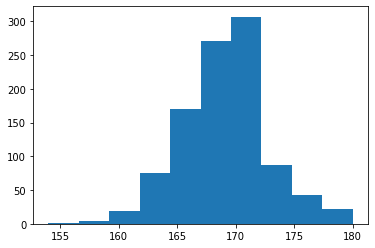

In [5]:
# plot scores
pyplot.hist(medians)
pyplot.show()

In [6]:
# confidence intervals
alpha = 0.95

# calculating lower C.I i.e 2.5% for 2.5th percentile value
p = ((1.0-alpha)/2.0) * 100
lower =  numpy.percentile(medians, p)

# calculating lower C.I i.e 97.5% for 97.5th percentile value
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  numpy.percentile(medians, p)
print('%.1f confidence interval %.1f and %.1f' % (alpha*100, lower, upper))

95.0 confidence interval 162.0 and 176.0


In [7]:
# Why is it this wide?? 176 - 162 = 14!!
# Because 'n' i.e len(x) itself is very small!!!

# If n were bigger, this interval might have been smaller/tighter.